In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps #Importing trapz, and simps module from scipy for numerical integration


Individual PMF data is saved in .xvg file, while diffusion data is saved in .txt file like in this case - Free energy of DEHP is in 2-DEHP.xvg, and its diffusion is in DEHP_dif.txt. Here, we have imported these data in a panda dataframe which simplifies our work.

In [3]:
pmf_dehp = pd.read_csv('2-DEHP.xvg', header = None, delim_whitespace=True)

In [4]:
# Checking the few data from pmf_dehp
pmf_dehp.head()

,0,1,2
0,0.005008,-44.65238,1.794111
1,0.015025,-44.65342,1.790558
2,0.025042,-44.62829,1.788121
3,0.035059,-44.61256,1.785940
4,0.045076,-44.59555,1.783410


In [5]:
# Similarly, looking at few last lines of the data
pmf_dehp.tail()

,0,1,2
416,4.172054,-0.101668,0.014071
417,4.182071,0.049095,0.015160
418,4.192088,-0.149261,0.015889
419,4.202105,0.595437,0.016376
420,4.212122,0.766363,0.016703


In [6]:
# Extrapolating for the data at 0
df = pd.DataFrame({0: [0.000000], 1: -44.65238, 2:1.794111})
df = df.append(pmf_dehp)
df = df.reset_index(drop=True)

In [7]:
# Just making a copy to have same name as original
pmf_dehp = df.copy(deep=True)

In [8]:
pmf_dehp.head()

,0,1,2
0,0.000000,-44.65238,1.794111
1,0.005008,-44.65238,1.794111
2,0.015025,-44.65342,1.790558
3,0.025042,-44.62829,1.788121
4,0.035059,-44.61256,1.785940


In [9]:
pmf_dehp.tail()

,0,1,2
417,4.172054,-0.101668,0.014071
418,4.182071,0.049095,0.015160
419,4.192088,-0.149261,0.015889
420,4.202105,0.595437,0.016376
421,4.212122,0.766363,0.016703


In [10]:
# We don't want the values of z distance above 4, so
pmf_dehp = pmf_dehp[pmf_dehp[0] <= 4.000000]

In [11]:
pmf_dehp.tail()

,0,1,2
395,3.951681,0.124851,0.022008
396,3.961698,0.121398,0.022350
397,3.971715,0.132617,0.013916
398,3.981732,0.100150,0.014667
399,3.991749,0.097642,0.014463


In [12]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.991749
pmf_dehp = pmf_dehp.append({0: 4.000000, 1: 0.097642, 2: 0.014463}, ignore_index = True)

In [13]:
pmf_dehp.tail()

,0,1,2
396,3.961698,0.121398,0.022350
397,3.971715,0.132617,0.013916
398,3.981732,0.100150,0.014667
399,3.991749,0.097642,0.014463
400,4.000000,0.097642,0.014463


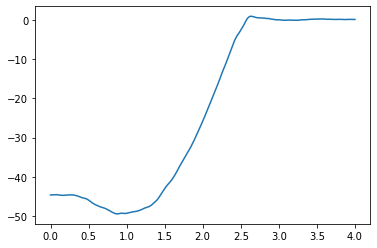

In [14]:
# Now, check a rough plot for free energy
plt.plot(pmf_dehp[0], pmf_dehp[1])

Now adding a $e^\frac{\Delta G}{RT}$ component in the last column of our PMF data. Here, $\Delta G$ is obtained from the second column pmf_dehp[1] and RT is 2.478 KJ/mol at 298K.

In [15]:
pmf_dehp[3] = np.exp(pmf_dehp[1]/2.478)

In [16]:
pmf_dehp.head()

,0,1,2,3
0,0.000000,-44.65238,1.794111,1.493552e-08
1,0.005008,-44.65238,1.794111,1.493552e-08
2,0.015025,-44.65342,1.790558,1.492925e-08
3,0.025042,-44.62829,1.788121,1.508142e-08
4,0.035059,-44.61256,1.785940,1.517746e-08


In [17]:
# Just checking some values in the last column if it makes sense
np.exp(-44.65238/2.478)

1.4935516397821283e-08

Now, importing the diffusion coefficient data for DEP........

In [18]:
diff_dehp = pd.read_csv('DEHP_dif.txt', header = None, delim_whitespace=True)

In [20]:
diff_dehp.head()

,0,1
0,0.0,1.616121e-06
1,0.1,5.624232e-07
2,0.2,8.932635e-09
3,0.3,5.504893e-07
4,0.4,1.965968e-07


In [21]:
diff_dehp.tail()

,0,1
36,3.6,0.000011
37,3.7,0.000008
38,3.8,0.000005
39,3.9,0.000011
40,4.0,0.000009


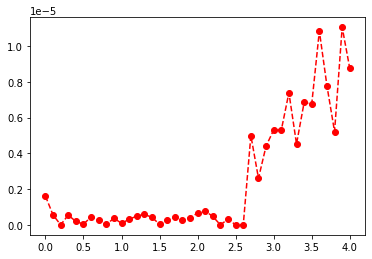

In [22]:
# Let's plot the data for diffusion coefficent of DEP
plt.plot(diff_dehp[0], diff_dehp[1], '--o', color = 'r')

Here, the linear interpolation is done for our diffusion coefficient so that we can obtain the missing values at the position specified by the PMF data. The function takes these values **np.interp(The z-coordinates at which to evaluate the interpolated values, The z-coordinates of the data points, The function values of these data points)**

In [23]:
diffusion_interpl = np.interp(pmf_dehp[0], diff_dehp[0], diff_dehp[1])

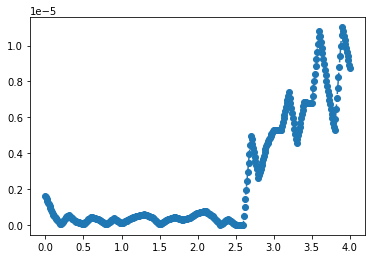

In [25]:
## Let's plot these interpolated values against the z - data points given by pmf_dep[0]
plt.plot(pmf_dehp[0], diffusion_interpl, '--o')

The interpolation does makes sense as the two graphs looks like a spitting mirror images of one another. Now, let's make another dataframe with these interpolation data for diffusion coefficient.

In [27]:
diff_dehp = pd.DataFrame({0: pmf_dehp[0].copy(deep = True), 1 : diffusion_interpl})

In [28]:
diff_dehp

,0,1
0,0.000000,0.000002
1,0.005008,0.000002
2,0.015025,0.000001
3,0.025042,0.000001
4,0.035059,0.000001
...,...,...
396,3.961698,0.000010
397,3.971715,0.000009
398,3.981732,0.000009
399,3.991749,0.000009


#### My first approach for the numerical integration will be to convert the distance in z which are in nm into cm for both pmf as well as diffusion coefficient. 

In [29]:
# For pmf_dep it will be ---
pmf_dehp[0] = pmf_dehp[0] * 1 * 10 ** -7
pmf_dehp.head()
# Here, the only columns we need to worry about is at the index 0 and 3 which are the values for z-distance in cm,
# exp(Delta G/RT)

,0,1,2,3
0,0.000000e+00,-44.65238,1.794111,1.493552e-08
1,5.008469e-10,-44.65238,1.794111,1.493552e-08
2,1.502540e-09,-44.65342,1.790558,1.492925e-08
3,2.504234e-09,-44.62829,1.788121,1.508142e-08
4,3.505928e-09,-44.61256,1.785940,1.517746e-08


In [30]:
pmf_dehp.tail()

,0,1,2,3
396,3.961698e-07,0.121398,0.022350,1.050210
397,3.971715e-07,0.132617,0.013916,1.054976
398,3.981732e-07,0.100150,0.014667,1.041243
399,3.991749e-07,0.097642,0.014463,1.040190
400,4.000000e-07,0.097642,0.014463,1.040190


In [31]:
# Similarly, for diffusion, it will be ....
diff_dehp[0] = diff_dehp[0] * 1 * 10 ** -7
diff_dehp.head()
# Here, the two columns are the z-distance in cm, and Diffusion coefficient in cm^2/2

,0,1
0,0.000000e+00,0.000002
1,5.008469e-10,0.000002
2,1.502540e-09,0.000001
3,2.504234e-09,0.000001
4,3.505928e-09,0.000001


In [32]:
diff_dehp.tail()

,0,1
396,3.961698e-07,0.000010
397,3.971715e-07,0.000009
398,3.981732e-07,0.000009
399,3.991749e-07,0.000009
400,4.000000e-07,0.000009


In [33]:
# Now, we can perform numerical integration with either composite trapezoidal rule, or the simpson's rule

$$\int_{0}^{4 \times 10 ^{-7}} \frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)} dz$$

In [34]:
#trapz(values of the function to integrate, sample points(z) corresponding to the function values, optional (dz)
#- spacing between the sample points(z))

In [35]:
integrand = pmf_dehp[3]/diff_dehp[1]

In [36]:
integrand

0           0.009242
1           0.009554
2           0.010241
3           0.011153
4           0.012174
           ...      
396    109006.778151
397    112188.536238
398    113513.732187
399    116325.283242
400    118851.609861
Length: 401, dtype: float64

Let's check some values of the integrand. For the first value at z = 0,

In [39]:
pmf_dehp[1].to_numpy()[0]

-44.65238

In [40]:
diff_dehp[1].to_numpy()[0]

1.6161208e-06

In [41]:
#Delta G = -44.65238, RT = 2.478, D(z) = 1.6161208e-06 cm^2/s
np.exp(-44.65238/2.478)/1.6161208e-06

0.009241584167360066

In [43]:
integrand[0] # We get same values both manually and with dataframe

0.009241584167360067

In [44]:
# Now, let's check at z = 4 nm or 4 e -7 cm
pmf_dehp[1].to_numpy()[-1] # Delta G

0.097642

In [45]:
diff_dehp[1].to_numpy()[-1] # Diffusion coefficient

8.7520074e-06

In [50]:
# Delta G = 0.097642, RT = 2.478, D(z) = 8.7520074e-06 cm^2/s
np.exp(0.097642/2.478)/8.7520074e-06

118851.60986109043

In [53]:
integrand[400] #Note: We haven't extrapolated the Delta G to be 0 at 4.00 nm. Same as expected

118851.60986109043

In [55]:
trapz(integrand, pmf_dehp[0])

2.961257081456137

In [56]:
# The permeability will be 1/integral
1/trapz(integrand, pmf_dehp[0])

0.3376944225012273

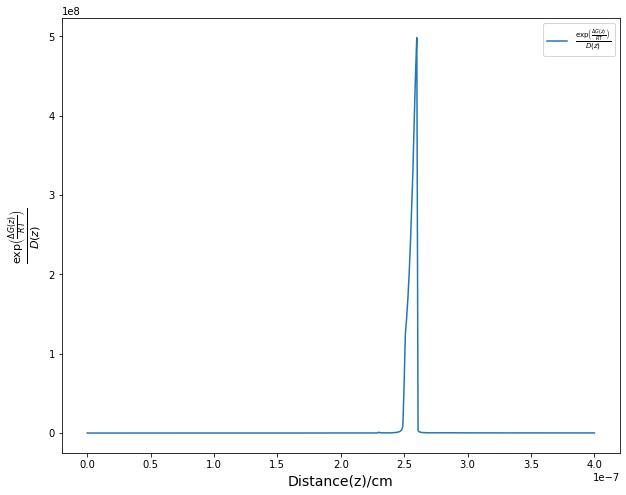

In [58]:
# Let's look at the plot of the integrand
plt.figure(figsize = (10,8))
plt.plot(pmf_dehp[0], integrand, label = r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$')
plt.xlabel('Distance(z)/cm', fontsize = 14)
plt.ylabel(r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$', fontsize = 16)
plt.legend()

### Using Simpson's method:

In [61]:
simps(integrand, pmf_dehp[0])

2.8750718593638767

In [63]:
# permeability will be
1/simps(integrand, pmf_dehp[0]) # Not much of a difference, though we can assume Trapezoidal to be more accurate as 
# we are using linear interpolation for our diffusion coefficient

0.347817393413344

#### My another approach for the numerical integration will be to convert diffusion coefficient (cm^2/s) into nm^2/s, integrate it over the distance in nm, and finally convert into cm/s

In [64]:
# Our both pmf and diffusion data
pmf_dehp.head()

,0,1,2,3
0,0.000000e+00,-44.65238,1.794111,1.493552e-08
1,5.008469e-10,-44.65238,1.794111,1.493552e-08
2,1.502540e-09,-44.65342,1.790558,1.492925e-08
3,2.504234e-09,-44.62829,1.788121,1.508142e-08
4,3.505928e-09,-44.61256,1.785940,1.517746e-08


In [65]:
diff_dehp.head()

,0,1
0,0.000000e+00,0.000002
1,5.008469e-10,0.000002
2,1.502540e-09,0.000001
3,2.504234e-09,0.000001
4,3.505928e-09,0.000001


In [66]:
# Let's convert the distance in both which are in cm back into nm, and also add another column in diffusion data 
# so that the coefficients are now converted into nm^2/s

In [67]:
pmf_dehp[0] = pmf_dehp[0] * 1 * 10 ** 7
diff_dehp[0] = diff_dehp[0] * 1 * 10 ** 7

In [69]:
# Let's check
pmf_dehp.head()

,0,1,2,3
0,0.000000,-44.65238,1.794111,1.493552e-08
1,0.005008,-44.65238,1.794111,1.493552e-08
2,0.015025,-44.65342,1.790558,1.492925e-08
3,0.025042,-44.62829,1.788121,1.508142e-08
4,0.035059,-44.61256,1.785940,1.517746e-08


In [70]:
diff_dehp.head()

,0,1
0,0.000000,0.000002
1,0.005008,0.000002
2,0.015025,0.000001
3,0.025042,0.000001
4,0.035059,0.000001


In [72]:
diff_dehp.tail()

,0,1
396,3.961698,0.000010
397,3.971715,0.000009
398,3.981732,0.000009
399,3.991749,0.000009
400,4.000000,0.000009


In [73]:
pmf_dehp.tail()

,0,1,2,3
396,3.961698,0.121398,0.022350,1.050210
397,3.971715,0.132617,0.013916,1.054976
398,3.981732,0.100150,0.014667,1.041243
399,3.991749,0.097642,0.014463,1.040190
400,4.000000,0.097642,0.014463,1.040190


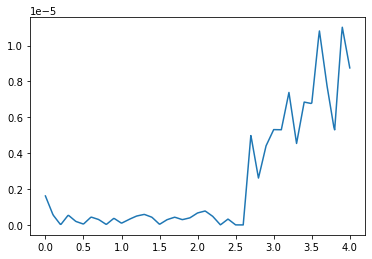

In [76]:
# Plotting both these two
plt.plot(diff_dehp[0], diff_dehp[1])

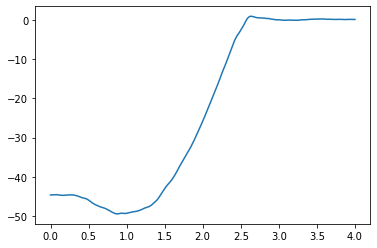

In [77]:
plt.plot(pmf_dehp[0], pmf_dehp[1])

In [78]:
# Converting diffusion coefficient into nm^2/s and adding it into the last column
diff_dehp[2] = diff_dehp[1] * 1 * 10 ** 14

In [80]:
diff_dehp.head()

,0,1,2
0,0.000000,0.000002,1.616121e+08
1,0.005008,0.000002,1.563347e+08
2,0.015025,0.000001,1.457799e+08
3,0.025042,0.000001,1.352250e+08
4,0.035059,0.000001,1.246702e+08


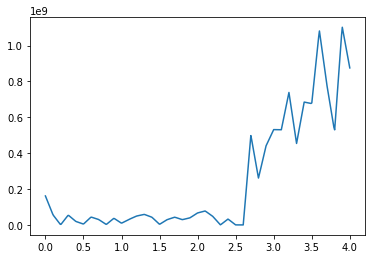

In [82]:
# Again, plotting to check
plt.plot(diff_dehp[0], diff_dehp[2])

In [83]:
pmf_dehp.head()

,0,1,2,3
0,0.000000,-44.65238,1.794111,1.493552e-08
1,0.005008,-44.65238,1.794111,1.493552e-08
2,0.015025,-44.65342,1.790558,1.492925e-08
3,0.025042,-44.62829,1.788121,1.508142e-08
4,0.035059,-44.61256,1.785940,1.517746e-08


In [84]:
integrand = pmf_dehp[3]/diff_dehp[2]

In [85]:
integrand

0      9.241584e-17
1      9.553554e-17
2      1.024096e-16
3      1.115283e-16
4      1.217409e-16
           ...     
396    1.090068e-09
397    1.121885e-09
398    1.135137e-09
399    1.163253e-09
400    1.188516e-09
Length: 401, dtype: float64

In [87]:
trapz(integrand, pmf_dehp[0])

2.961257081456148e-07

In [88]:
1/trapz(integrand, pmf_dehp[0]) # This is now in nm/s

3376944.2250122605

In [89]:
# Converting into cm/s
1/trapz(integrand, pmf_dehp[0]) * 1 * 10 ** -7

0.33769442250122605

In [90]:
# So, both the methods I have mentioned in here fetches us the same result

In [91]:
1/simps(integrand, pmf_dehp[0]) * 1 * 10 ** -7

0.34781739341334267